# Problem Set 1, due April 8th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

### Before You Start
For this problem set, you should download INF0371-PS1.ipynb from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

# I used seaborn for the correlation matrix
import seaborn as sns
print("Seaborn version: %6.6s" % sns.__version__)

IPython version:       4.1.2 (need at least 1.0)
Numpy version:        1.11.0 (need at least 1.7.1)
SciPy version:        0.17.0 (need at least 0.12.0)
Pandas version:       0.18.0 (need at least 0.11.0)
Maplotlib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)
Seaborn version:  0.7.0


C:\Anaconda3\envs\py27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Working in a group?
List the names of other students with whom you worked on this problem set:
- Annie Tao

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print bdata.keys()
print bdata.feature_names
print bdata.data.shape
print bdata.target.shape

# uncomment the following if you want to see a lengthy description of the dataset
print bdata.DESCR

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506L, 13L)
(506L,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      ind

In [4]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
print boston.shape
print boston.columns

median = pd.DataFrame(bdata.target)
median.columns = ['MEDV']

boston = pd.concat([boston, median], axis=1)

print boston.shape

(506, 13)
Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')
(506, 14)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [5]:
##### enter your code here
print("axes")
print(boston.axes)
print("")

# 1.1.1 : 14 variables, 506 rows, 7084 observations
print("1.1.1")
print("shape " + str(boston.shape))
print("size " + str(boston.size))
print("")

# 1.1.2 : there are 35
print("1.1.2")
print(boston[boston.CHAS == 1].shape)
print("")

# 1.1.3 : not null is the same size as the actual object
print("1.1.3")
print(pd.DataFrame.notnull(boston).size)
print("")

# 1.1.4 : 
# 198.0
# 307.0
# 666.0
# 666.0
# 666.0
print("1.1.4")
print(boston.sort_values(['MEDV'], ascending=[0])[['MEDV', 'TAX']].head(18))

axes
[RangeIndex(start=0, stop=506, step=1), Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')]

1.1.1
shape (506, 14)
size 7084

1.1.2
(35, 14)

1.1.3
7084

1.1.4
     MEDV    TAX
283  50.0  198.0
225  50.0  307.0
369  50.0  666.0
370  50.0  666.0
371  50.0  666.0
372  50.0  666.0
186  50.0  193.0
204  50.0  224.0
257  50.0  264.0
195  50.0  255.0
166  50.0  403.0
163  50.0  403.0
267  50.0  264.0
162  50.0  403.0
161  50.0  403.0
368  50.0  666.0
262  48.8  264.0
203  48.5  224.0


**Answers**

 - 1.1.1: 14 variables, 506 rows, 7084 observations
 - 1.1.2: 35 neighborhoods bound the river
 - 1.1.3: not null returns 7084 observations, the same as rows * variables
 - 1.1.4: 198.0, 307.0, 666.0, 666.0, 666.0, it should be noted however that the top 16 neighborhoods all tied at $50,000; See table for all values.

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [6]:
# 1.2.1 :  50
print('1.2.1')
print(boston.sort_values(['MEDV'], ascending=[0]).MEDV.head(1))
print("")

# 1.2.2 : 15 neighborhoods
print('1.2.2')
print(boston[boston.RM < 5].shape)
print("")

# 1.2.3 : 198.0
print('1.2.3')
print(boston.sort_values(['MEDV'], ascending=[0])[boston.CHAS == 1][['MEDV', 'TAX']].head(8))
print("")

# 1.2.4 : 0.01501
print('1.2.4')
print(boston.sort_values(['MEDV'], ascending=[0])[['MEDV', 'CRIM']].head(18))
print("")

# 1.2.5 : 38.3518
print('1.2.5')
print(boston.sort_values(['MEDV'], ascending=[1])[['MEDV', 'CRIM']].head(4))

1.2.1
283    50.0
Name: MEDV, dtype: float64

1.2.2
(15, 14)

1.2.3
     MEDV    TAX
283  50.0  198.0
369  50.0  666.0
370  50.0  666.0
372  50.0  666.0
163  50.0  403.0
162  50.0  403.0
282  46.0  216.0
273  35.2  223.0

1.2.4
     MEDV     CRIM
283  50.0  0.01501
225  50.0  0.52693
369  50.0  5.66998
370  50.0  6.53876
371  50.0  9.23230
372  50.0  8.26725
186  50.0  0.05602
204  50.0  0.02009
257  50.0  0.61154
195  50.0  0.01381
166  50.0  2.01019
163  50.0  1.51902
267  50.0  0.57834
162  50.0  1.83377
161  50.0  1.46336
368  50.0  4.89822
262  48.8  0.52014
203  48.5  0.03510

1.2.5
     MEDV      CRIM
398   5.0  38.35180
405   5.0  67.92080
400   5.6  25.04610
399   6.3   9.91655


C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


**Answers**

 - 1.2.1: \$50,000
 - 1.2.2: 15 neighborhoods
 - 1.2.3: \$198 per \$10,000, but there are actually 6 that tie. See table for all values.
 - 1.2.4: 0.01501 per capita, but there are 16 that tie. See table for all values.
 - 1.2.5: 38.3518 per capita and 67.92080 per capita, there are 2 that tie.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [7]:
columns = ['name', 'observations', 'mean', 'std', 'min', 'med', 'max']
data = []

# generate the summary stats
for column in boston:
    row = []
    row.append(column)
    row.append(np.count_nonzero(~np.isnan(boston[column])))
    row.append(boston[column].mean())
    row.append(boston[column].std())
    row.append(boston[column].min())
    row.append(boston[column].median())
    row.append(boston[column].max())
    data.append(row)

# put the summary stats in a data frame
summary = pd.DataFrame(data)
summary.columns = columns
summary

,name,observations,mean,std,min,med,max
0,CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
1,ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
2,INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
3,CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
4,NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
5,RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
6,AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
7,DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
8,RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
9,TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

In [8]:
sp.stats.ttest_ind(boston[boston.CHAS == 1].MEDV, boston[boston.CHAS == 0].MEDV)

# reject null hypothesis

Ttest_indResult(statistic=3.9964374660905091, pvalue=7.3906231705199048e-05)

A t-test returns a p-value of about 7.39*10^-5, or about 0.00007. This small p-value inplies that the null hypothesis, that the pices are equivalent, is to be rejected. 

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


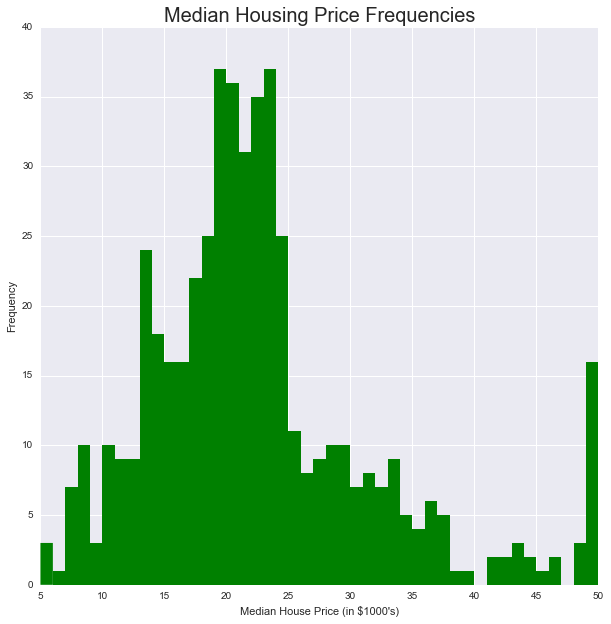

In [9]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# make the plot
plt.hist(bdata.target,
         bins = (int(np.max(bdata.target)) - int(np.min(bdata.target))),
         color = 'green',
         linewidth = 0
         )

# make the labels
plt.gcf().set_size_inches(10,10)
plt.xlabel('Median House Price (in $1000\'s)')
plt.ylabel('Frequency')
plt.title('Median Housing Price Frequencies', fontsize=20)

# get rid of lines we don't want
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', top='off')     
plt.tick_params(axis='y', right='off')

plt.show()

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


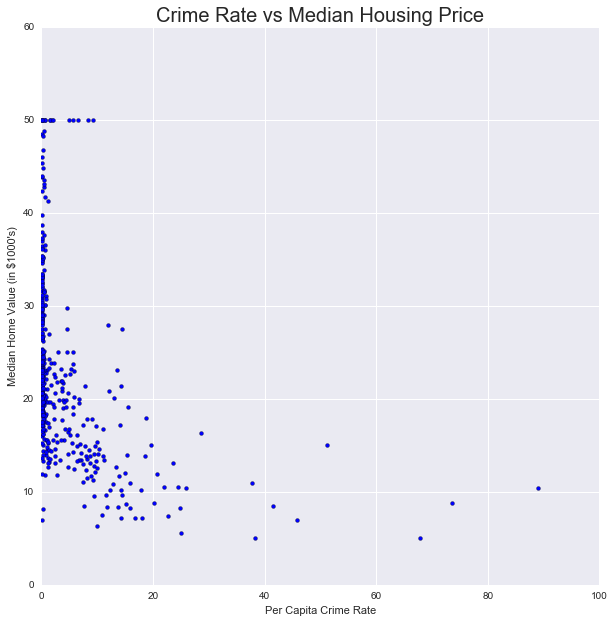

In [10]:
# make the plot
plt.scatter(boston.CRIM, boston.MEDV, s=15)

# make the labels and axes
plt.gcf().set_size_inches(10,10)
plt.xlabel('Per Capita Crime Rate')
plt.ylabel('Median Home Value (in $1000\'s)')
plt.xlim(0)
plt.title('Crime Rate vs Median Housing Price', fontsize=20)

# get rid of lines we don't want
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', top='off')     
plt.tick_params(axis='y', right='off')

plt.show()

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

In [11]:
sp.stats.pearsonr(boston.CRIM, boston.MEDV)

(-0.38583168988399053, 2.0835501108141935e-19)

There appears to be a correlation with a coefficient of about -0.386 a p-value of about 2.08*10^-19. This implies that median housing price is moderately negatively correlated to per capita crime rates. The very low p-value imples that this result very unlikely to have occured if the null hypothesis, that crime are housing price are not correlated, was true; therefore I can conclude they are correlated.

I cannot with the data present make any conclusion as to causation. There is certainly a correlation, but the does not in itself justify causation at all. I would need more information from an experiment linking crime rates to housing price before I could make the assertion that there is definitly a causation effect of crime on housing price or vice versa.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear green (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

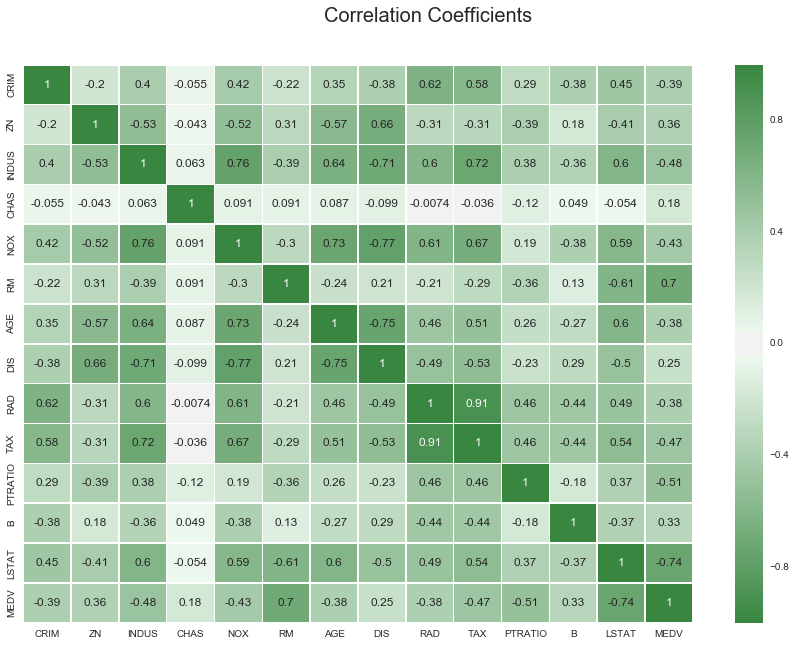

In [12]:
# calculate the correlations for each combination
correlations = [None] * boston.shape[1]
columns = [None] * (boston.shape[1]) # prepare column names for dataframe
i = 0
for i_column in boston:
    j = 0
    columns[i ] = i_column
    correlations[i] = [None] * (boston.shape[1])
    correlations[i][0] = i_column
    for j_column in boston:
        correlations[i][j] = sp.stats.pearsonr(boston[i_column], boston[j_column])[0]
        j += 1
    i += 1

# create the frame and label it
correlations_frame = pd.DataFrame(correlations)
correlations_frame.columns = columns
correlations_frame.index = columns
correlations_frame

# Draw the matrix
sns.set()
correlations_frame
plt.figure(figsize=(15,10))
sns.heatmap(correlations_frame, annot=True, linewidths=.5, cmap=sns.diverging_palette(130, 130, as_cmap=True))

# set matrix title
plt.gcf().suptitle('Correlation Coefficients', fontsize=20)

NEG: DIS is negatively correlated to NOX at the lowest value
POS: TAX is positively correlated to RAD at the highest value (besides things to themselves)

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

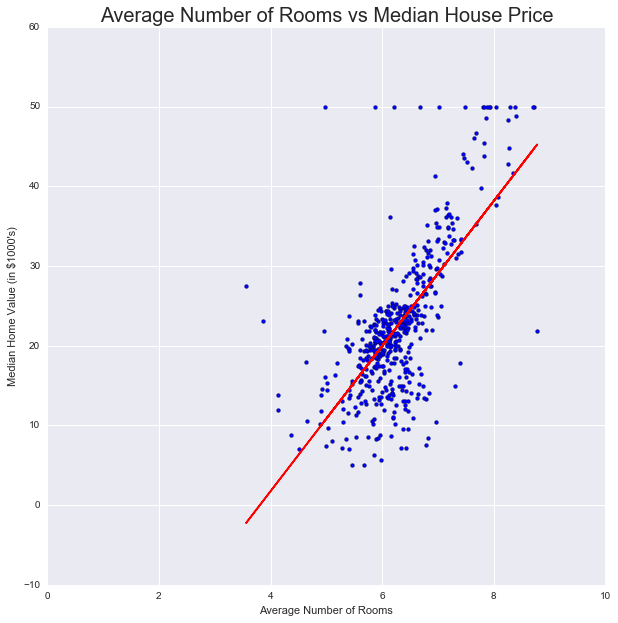

In [13]:
# Get x and y
x = boston.RM
y = boston.MEDV

# make the plot
plt.scatter(x, y, s=15)

# set the size labels and axes
plt.gcf().set_size_inches(10,10)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value (in $1000\'s)')
plt.xlim(0)
plt.title('Average Number of Rooms vs Median House Price', fontsize=20)

# get rid of lines we don't want
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='x', top='off')     
plt.tick_params(axis='y', right='off')

# calculate a best fit line
m, b = np.polyfit(x, y, 1)

# plot the line
plt.plot(x, m*x + b, color = 'red')